In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from PIL import Image
from tqdm import tqdm
import cv2
from functools import partial

In [2]:
data_path = "/users/riya/race/dataset/segmentations/"

In [3]:
image_set = os.listdir(data_path)

In [4]:
len(image_set)

4546

In [7]:
color_histogram = np.zeros((224 * 224 * 4546))

for i in tqdm(range(len(image_set))):
    # print('um')
    img_arr = np.array(Image.open(data_path + image_set[i]))
    # print(img_arr.shape)
    resized_img = cv2.resize(img_arr, (224, 224))
    flat_img = resized_img.flatten()
    
    for j in range(len(flat_img)):
        hist_loc = j + i * (224 * 224)
        color_histogram[hist_loc] = flat_img[j]    
    
    # print(pd.value_counts(flat_img))
    
    # print(len(flat_img))
    
    # for j, v in enumerate(flat_img):
        # color_histogram[j] = (v)

100%|██████████| 4546/4546 [02:03<00:00, 36.89it/s]


In [8]:
len(color_histogram)

228100096

In [ ]:
col

In [9]:
pd.value_counts(color_histogram)

0.0      175531891
1.0       18055490
2.0        6690657
3.0        3864329
4.0        2596738
           ...    
248.0          765
249.0          397
250.0          186
251.0           74
252.0            6
Length: 253, dtype: int64

In [10]:
color_nonzero = color_histogram[color_histogram != 0]

In [11]:
len(color_nonzero)

52568205

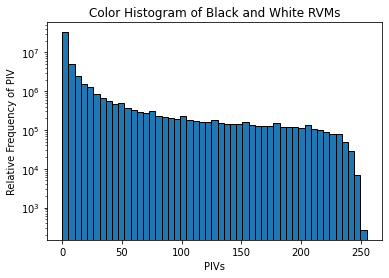

In [13]:
plt.title("Color Histogram of Black and White RVMs")
plt.xlabel("PIVs")
plt.ylabel("Relative Frequency of PIV")

plt.yscale('log')

bins = np.linspace(0, 255, 50)
plt.hist(color_nonzero, bins, edgecolor = 'k')
plt.show()

In [27]:
def get_color_histogram_array(race_bool, race, 
                             data_path = "/users/riya/race/dataset/segmentations/", 
                             race_csv_path = "/users/riya/race/csv/image_race_data.csv"):
    
    race_data = pd.read_csv(race_csv_path)
   
    # number of white images: 2837
    # number of black images: 1709
    
    image_set = os.listdir(data_path)
    color_histogram = np.zeros((224 * 224 * 4546))
    
    if race_bool == True:
        assert (race == 'black' or race == 'white')
        if race == 'black':
            image_set = np.array(race_data.loc[race_data['race']=='black','segmentation_location'])
            color_histogram = np.zeros((224 * 224 * 1709))
        elif race == 'white':
            image_set = np.array(race_data.loc[race_data['race']=='white','segmentation_location'])
            color_histogram = np.zeros((224 * 224 * 2837))
    
    for i in tqdm(range(len(image_set))):
        img_arr = np.array(Image.open(data_path + image_set[i]))
        resized_img = cv2.resize(img_arr, (224, 224))
        flat_img = resized_img.flatten()
    
        for j in range(len(flat_img)):
            hist_loc = j + i * (224 * 224)
            color_histogram[hist_loc] = flat_img[j]  

    color_nonzero = color_histogram[color_histogram!= 0]
    return color_histogram, color_nonzero

In [28]:
white_histogram, white_nonzero = get_color_histogram_array(True, 'white') 

100%|██████████| 2837/2837 [01:03<00:00, 44.82it/s]


In [30]:
black_histogram, black_nonzero = get_color_histogram_array(True, 'black') 

100%|██████████| 1709/1709 [00:39<00:00, 43.72it/s]


In [29]:
len(white_histogram), len(white_nonzero)

(142349312, 36955909)

In [34]:
len(black_histogram), len(black_nonzero)

(85750784, 15612296)

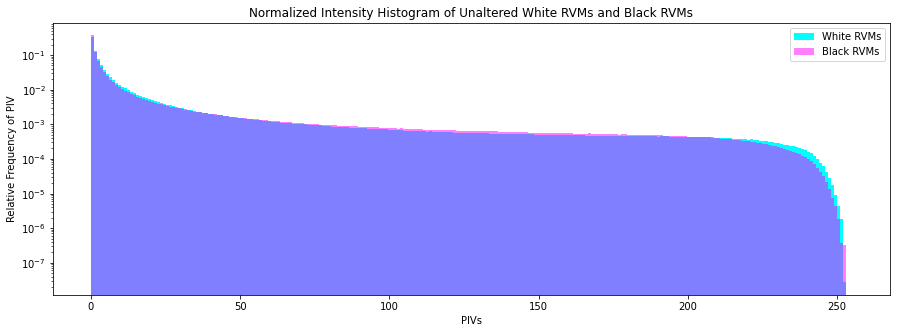

In [117]:
plt.title("Normalized Intensity Histogram of Unaltered White RVMs and Black RVMs")
plt.xlabel("PIVs")
plt.ylabel("Relative Frequency of PIV")
plt.yscale('log')
plt.gcf().set_size_inches(15, 5)

bins = np.linspace(0, 255, 255)

plt.hist(white_nonzero, bins, edgecolor = None, density = True, histtype = 'stepfilled',
         fc = (0, 1, 1, 1),
         label = 'White RVMs')

plt.hist(black_nonzero, bins, edgecolor = None, density = True, histtype = 'stepfilled',
         fc = (1, 0, 1, 1), alpha = 0.5,
         label = 'Black RVMs')

plt.legend(loc = 'upper right')
plt.show()

In [59]:
value_counts_white = dict(pd.value_counts(white_nonzero)/4546)
value_counts_black = dict(pd.value_counts(black_nonzero)/4546)

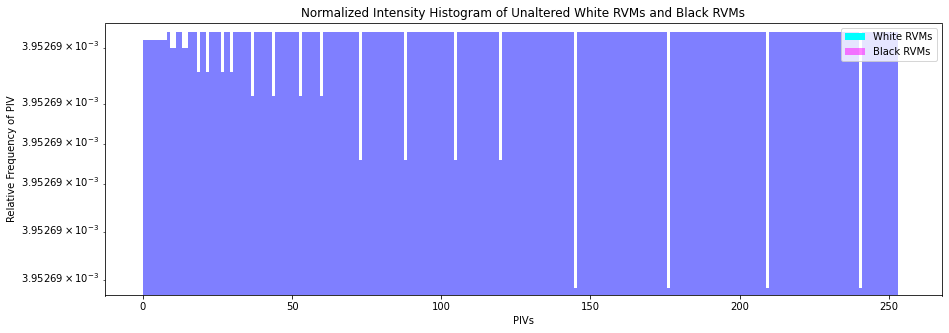

In [121]:
plt.title("Normalized Intensity Histogram of Unaltered White RVMs and Black RVMs")
plt.xlabel("PIVs")
plt.ylabel("Relative Frequency of PIV")
plt.yscale('log')
plt.gcf().set_size_inches(15, 5)

bins = np.linspace(0, 255, 255)

x_axis = np.arange(len(value_counts_white.keys()))

plt.hist(value_counts_white.values(), bins, edgecolor = None, density = True, histtype = 'stepfilled',
         fc = (0, 1, 1, 1),
         label = 'White RVMs')

plt.hist(value_counts_black.values(), bins, edgecolor = None, density = True, histtype = 'stepfilled',
         fc = (1, 0, 1, 1), alpha = 0.5,
         label = 'Black RVMs')

plt.legend(loc = 'upper right')
plt.show()

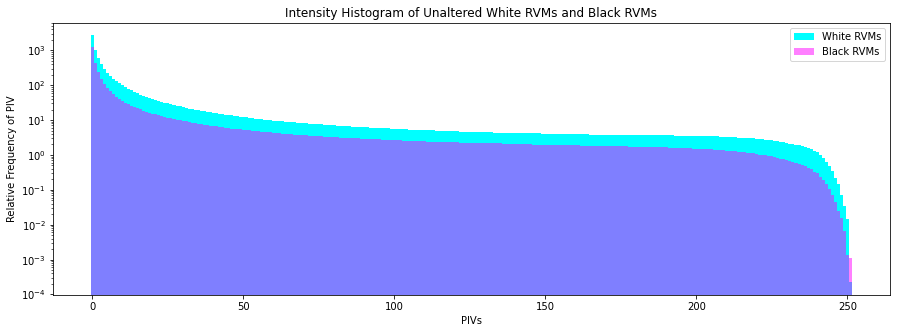

In [119]:
plt.title("Intensity Histogram of Unaltered White RVMs and Black RVMs")
plt.xlabel("PIVs")
plt.ylabel("Relative Frequency of PIV")
plt.yscale('log')
plt.gcf().set_size_inches(15, 5)

width = 1
x_axis = np.arange(len(value_counts_white.keys()))

plt.bar(x_axis, value_counts_white.values(), width = width, edgecolor=None, 
        fc = (0, 1, 1, 1),
        label = "White RVMs")
plt.bar(x_axis, value_counts_black.values(), width = width, edgecolor=None, 
        fc = (1, 0, 1, 1), alpha = 0.5,
        label = "Black RVMs")

plt.legend()

plt.show()

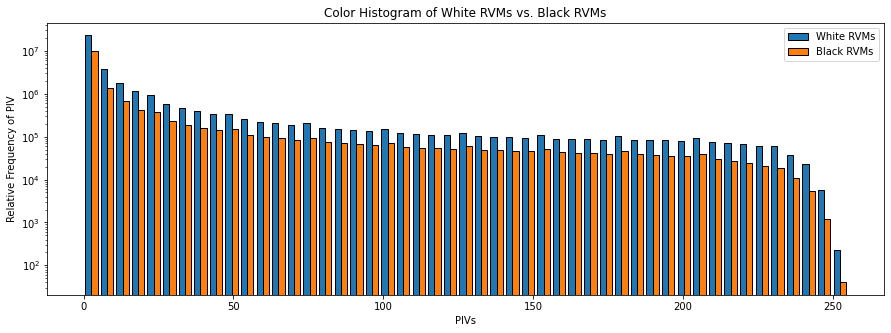

In [45]:
plt.title("Color Histogram of White RVMs vs. Black RVMs")
plt.xlabel("PIVs")
plt.ylabel("Relative Frequency of PIV")
plt.yscale('log')
plt.gcf().set_size_inches(15, 5)

bins = np.linspace(0, 255, 50)
plt.hist([white_nonzero, black_nonzero], bins, edgecolor = 'k', density = False, 
         label = ['White RVMs', 'Black RVMs'])
plt.legend(loc = 'upper right')
plt.show()